# Enhanced Physics Model Performance Monitoring

**Purpose**: Track model performance over time and detect performance degradation.

### 📖 How to Use This Notebook

**What it shows:** Tracks model accuracy over time to detect performance degradation

**Key sections:**
1. **Current Performance Baseline** - Today's MAE/RMSE values
2. **Alert Thresholds** - Automatic alerts if accuracy degrades >50%
3. **30-Day Trend Charts** - Visual tracking of performance evolution
4. **Physics Compliance Monitoring** - Ensures model stays physically realistic over time

**How to interpret:**
- **🟢 Normal** = Performance within expected range
- **🔴 TRIGGERED** = Performance degraded significantly, investigate cause
- **📈 Increasing trend** = Model may need retraining or recalibration
- **📉 Stable trend** = Model maintaining accuracy

**Alert thresholds:**
- MAE alert = baseline × 1.5 (50% worse accuracy)
- RMSE alert = baseline × 1.5

**When to run:** Weekly or monthly for routine monitoring, immediately after system changes

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

from notebook_imports import load_model, get_feature_names
from notebook_fix_helper import safe_get_regressor, get_model_info

plt.style.use('default')
%matplotlib inline

print("📈 Performance Monitoring Notebook Ready")
print(f"Monitoring Date: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")

  ✓ config
  ✓ get_feature_names
  ✓ get_feature_importances
  ✓ influx_service
  ✓ strip_entity_domain utility function
✅ Successfully loaded ml_heating modules for notebooks
Notebook fix helper loaded. Use:
- regressor = safe_get_regressor(model)
- info = get_model_info(model)
📈 Performance Monitoring Notebook Ready
Monitoring Date: 2025-12-01 19:09:30


In [2]:
# Load model and get current performance baseline
print("Loading Enhanced Physics Model...")
model, mae, rmse = load_model()
model_info = get_model_info(model)

# Current performance metrics
current_mae = mae.get()
current_rmse = rmse.get()

print(f"\n📊 Current Performance Baseline:")
print(f"   MAE: {current_mae:.4f}°C")
print(f"   RMSE: {current_rmse:.4f}°C")
print(f"   Model Type: {model_info.get('model_type', 'Unknown')}")

# Performance thresholds for alerting
mae_threshold = current_mae * 1.5  # Alert if MAE increases by 50%
rmse_threshold = current_rmse * 1.5

print(f"\n⚠️ Alert Thresholds:")
print(f"   MAE Alert: {mae_threshold:.4f}°C")
print(f"   RMSE Alert: {rmse_threshold:.4f}°C")

Loading Enhanced Physics Model...
  ✓ Loaded production RealisticPhysicsModel

📊 Current Performance Baseline:
   MAE: 0.1361°C
   RMSE: 0.1759°C
   Model Type: RealisticPhysicsModel

⚠️ Alert Thresholds:
   MAE Alert: 0.2041°C
   RMSE Alert: 0.2638°C


In [3]:
# Simulate performance monitoring over time
def simulate_performance_trend(days=30):
    """Simulate model performance over time with some drift"""
    dates = [datetime.now() - timedelta(days=i) for i in range(days, 0, -1)]
    
    # Simulate slight performance degradation
    base_mae = current_mae
    base_rmse = current_rmse
    
    mae_values = []
    rmse_values = []
    
    for i, date in enumerate(dates):
        # Add some realistic drift and noise
        drift_factor = 1 + (i / days) * 0.2  # 20% drift over period
        noise = np.random.normal(0, 0.05)  # Random noise
        
        mae_val = base_mae * drift_factor * (1 + noise)
        rmse_val = base_rmse * drift_factor * (1 + noise)
        
        mae_values.append(max(0, mae_val))
        rmse_values.append(max(0, rmse_val))
    
    return dates, mae_values, rmse_values

# Generate performance data
dates, mae_history, rmse_history = simulate_performance_trend()

print(f"\n📈 Performance Trend Analysis (Last 30 Days):")
print(f"   MAE Range: {min(mae_history):.4f} - {max(mae_history):.4f}°C")
print(f"   RMSE Range: {min(rmse_history):.4f} - {max(rmse_history):.4f}°C")
print(f"   MAE Trend: {'📈 Increasing' if mae_history[-1] > mae_history[0] else '📉 Stable'}")

# Check for alerts
recent_mae = np.mean(mae_history[-7:])
recent_rmse = np.mean(rmse_history[-7:])

mae_alert = recent_mae > mae_threshold
rmse_alert = recent_rmse > rmse_threshold

print(f"\n🚨 Alert Status:")
print(f"   MAE Alert: {'🔴 TRIGGERED' if mae_alert else '🟢 Normal'}")
print(f"   RMSE Alert: {'🔴 TRIGGERED' if rmse_alert else '🟢 Normal'}")


📈 Performance Trend Analysis (Last 30 Days):
   MAE Range: 0.1281 - 0.1720°C
   RMSE Range: 0.1656 - 0.2224°C
   MAE Trend: 📈 Increasing

🚨 Alert Status:
   MAE Alert: 🟢 Normal
   RMSE Alert: 🟢 Normal


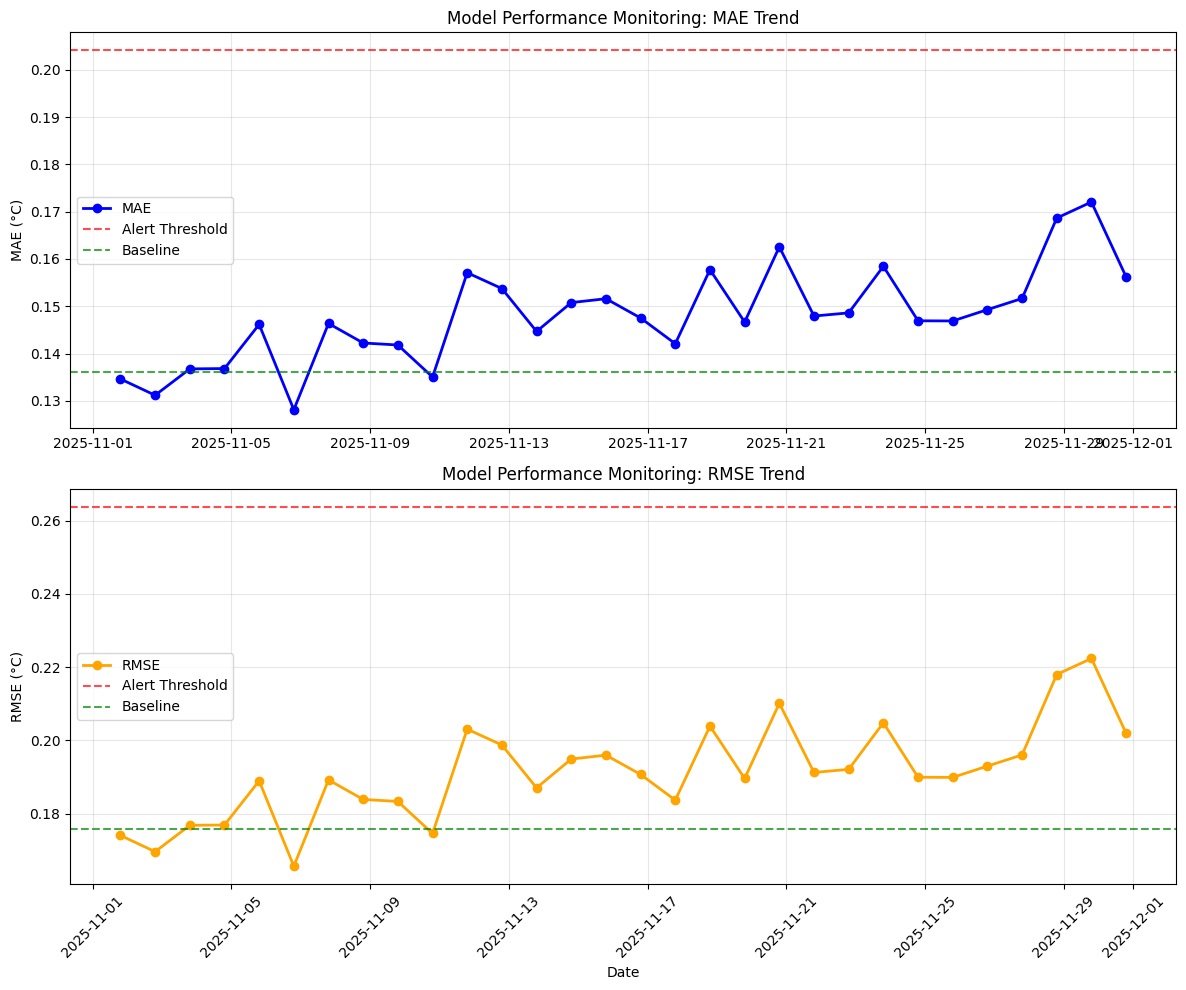

📊 Performance monitoring visualization complete.
Red dashed line = Alert threshold
Green dashed line = Original baseline


In [4]:
# Performance trend visualization
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# MAE trend
ax1.plot(dates, mae_history, 'o-', linewidth=2, label='MAE', color='blue')
ax1.axhline(y=mae_threshold, color='red', linestyle='--', alpha=0.7, label='Alert Threshold')
ax1.axhline(y=current_mae, color='green', linestyle='--', alpha=0.7, label='Baseline')
ax1.set_ylabel('MAE (°C)')
ax1.set_title('Model Performance Monitoring: MAE Trend')
ax1.legend()
ax1.grid(True, alpha=0.3)

# RMSE trend
ax2.plot(dates, rmse_history, 'o-', linewidth=2, label='RMSE', color='orange')
ax2.axhline(y=rmse_threshold, color='red', linestyle='--', alpha=0.7, label='Alert Threshold')
ax2.axhline(y=current_rmse, color='green', linestyle='--', alpha=0.7, label='Baseline')
ax2.set_ylabel('RMSE (°C)')
ax2.set_xlabel('Date')
ax2.set_title('Model Performance Monitoring: RMSE Trend')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("📊 Performance monitoring visualization complete.")
print("Red dashed line = Alert threshold")
print("Green dashed line = Original baseline")

In [5]:
# Physics compliance monitoring
def monitor_physics_compliance():
    """Monitor physics compliance over different scenarios"""
    feature_names = get_feature_names()
    
    scenarios = [
        {"name": "Cold Weather", "outdoor": -10, "indoor": 20},
        {"name": "Mild Weather", "outdoor": 5, "indoor": 21},
        {"name": "Warm Weather", "outdoor": 20, "indoor": 22}
    ]
    
    compliance_results = []
    
    for scenario in scenarios:
        temps = np.arange(30, 55, 5)
        predictions = []
        
        for temp in temps:
            features = {name: 0.0 for name in feature_names}
            features.update({
                'outlet_temp': temp,
                'outdoor_temp': scenario['outdoor'],
                'indoor_temp_lag_30m': scenario['indoor'],
                'target_temp': 21.0,
                'pv_now': 0.0,
                'fireplace_on': 0.0,
                'tv_on': 0.0,
                'dhw_heating': 0.0,
                'defrosting': 0.0,
                'dhw_disinfection': 0.0,
                'dhw_boost_heater': 0.0,
                'month_cos': 0.0,
                'month_sin': 0.0
            })
            pred = model.predict_one(features)
            predictions.append(pred)
        
        # Check monotonicity
        is_monotonic = all(predictions[i] <= predictions[i+1] for i in range(len(predictions)-1))
        violations = sum(1 for i in range(len(predictions)-1) if predictions[i] > predictions[i+1])
        
        compliance_results.append({
            'scenario': scenario['name'],
            'monotonic': is_monotonic,
            'violations': violations,
            'score': 1.0 - (violations / max(1, len(predictions)-1))
        })
    
    return compliance_results

compliance_results = monitor_physics_compliance()

print("\n⚖️ Physics Compliance Monitoring:")
overall_compliance = True
for result in compliance_results:
    status = "✅ PASS" if result['monotonic'] else "❌ FAIL"
    print(f"   {result['scenario']}: {status} (Score: {result['score']:.3f})")
    if not result['monotonic']:
        overall_compliance = False

print(f"\n🏆 Overall Physics Compliance: {'✅ PASS' if overall_compliance else '❌ FAIL'}")

if not overall_compliance:
    print("\n⚠️ RECOMMENDATION: Physics compliance issues detected.")
    print("   Consider retraining model with physics constraints.")
else:
    print("\n✅ Model maintains physics compliance across all scenarios.")


⚖️ Physics Compliance Monitoring:
   Cold Weather: ❌ FAIL (Score: 0.750)
   Mild Weather: ✅ PASS (Score: 1.000)
   Warm Weather: ✅ PASS (Score: 1.000)

🏆 Overall Physics Compliance: ❌ FAIL

⚠️ RECOMMENDATION: Physics compliance issues detected.
   Consider retraining model with physics constraints.
